# MDI220
# Statistics

# Project

This is the project for the course on statistics.

You must fill this notebook and upload it on eCampus, **including figures**. Please make sure that it runs **without erros**.

You can work in teams but the final notebook, including text and code, must be **yours**. Any copy-pasting across students is strictly forbidden.

Please provide **concise answers** and **concise code**, with comments when appropriate.

## Your name:

Mohamad Jawad ABOU ALEIWI

## Imports

Please do **not** import any other library.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import norm, chi2, gaussian_kde

In [3]:
import seaborn as sns

## Data

We consider the **daily electric power consumption** (in MW) in France in the period 2013-2023. The dataset is available on **eCampus**.

Detailed information on this dataset is available [here](https://www.data.gouv.fr/fr/datasets/consommation-quotidienne-brute-regionale/).

In [ ]:
# do not modify this cell
filename = 'power_consumption.csv'
df = pd.read_csv(filename)

In [5]:
df.head()

,region,date,consumption
0,Auvergne-Rhône-Alpes,2013-01-01,7560
1,Auvergne-Rhône-Alpes,2013-01-02,8700
2,Auvergne-Rhône-Alpes,2013-01-03,9367
3,Auvergne-Rhône-Alpes,2013-01-04,9133
4,Auvergne-Rhône-Alpes,2013-01-05,8283


In [6]:
regions = list(df.region.unique())

In [7]:
regions

['Auvergne-Rhône-Alpes',
 'Bourgogne-Franche-Comté',
 'Bretagne',
 'Centre-Val de Loire',
 'Grand Est',
 'Hauts-de-France',
 'Normandie',
 'Nouvelle-Aquitaine',
 'Occitanie',
 'Pays de la Loire',
 "Provence-Alpes-Côte d'Azur",
 'Île-de-France']

In [8]:
# average consumption per region
df[["region", "consumption"]].groupby("region").mean().astype(int)

,consumption
region,
Auvergne-Rhône-Alpes,7495
Bourgogne-Franche-Comté,2416
Bretagne,2546
Centre-Val de Loire,2139
Grand Est,5155
Hauts-de-France,5726
Normandie,3168
Nouvelle-Aquitaine,4925
Occitanie,4266


In [9]:
# average consumption in France (MW)
df[["region", "consumption"]].groupby("region").mean().sum().astype(int)

consumption    53582
dtype: int64

In [10]:
# selection of a region
region = "Bretagne"
df_region = df[df.region == region]

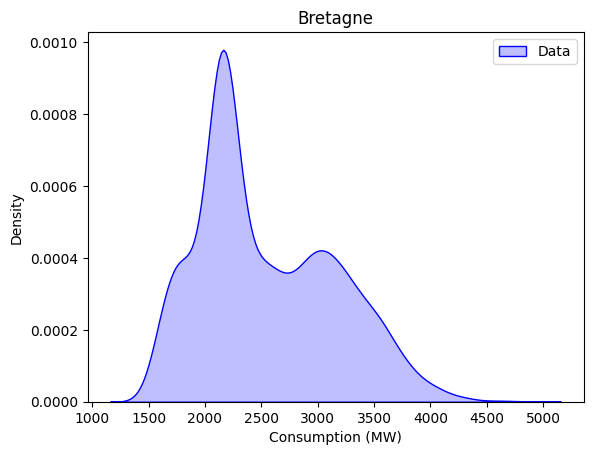

In [11]:
# density (with kde = kernel density estimation)
sns.kdeplot(data=df_region, x="consumption", label="Data", color='blue', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend()
plt.show()

## A. Parameter estimation

In all the project, the daily power consumptions are assumed to be i.i.d., with a Gaussian distribution.

We use the following estimators for the mean and the variance, given $n$ observations $x_1,\ldots,x_n$:
$$
\hat \mu = \frac 1 n \sum_{i=1}^n x_i\quad \hat{\sigma^2} = \frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2
$$
The corresponding estimate of the standard deviation is:
$$
\hat \sigma = \sqrt{\hat{\sigma^2}}
$$

Consider the region Bretagne.

1. Show that the estimators for the mean and the variance are unbiased.

Your answer:

For the mean:
$$
E(\hat \mu) = E(\frac 1 n \sum_{i=1}^n x_i\quad)
$$
$$
E(\hat \mu) = \frac 1 n E( \sum_{i=1}^n x_i\quad)
$$
Having:
$$
E(x_i\quad) = \mu  
$$
The expectation is linear:
$$
E(\hat \mu) = \frac 1 n n \mu
$$
$$
E(\hat \mu) = \mu
$$
Thus this estimator of the mean is unbiased.

For the variance:
$$
E(\hat{\sigma^2}) = E(\frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2)
$$

$$
E(\hat{\sigma^2}) = \frac 1 {n-1} E(\sum_{i=1}^n (x_i - \hat \mu)^2)
$$

$$
E(\hat{\sigma^2}) = \frac 1 {n-1} E(\sum_{i=1}^n (x_i ^2  + \hat \mu ^2 - 2 x_i \hat \mu))
$$

$$
E(\hat{\sigma^2}) = \frac 1 {n-1} E((\sum_{i=1}^n x_i ^2)  + \sum_{i=1}^n(\hat \mu ^2) - 2\sum_{i=1}^n( x_i \hat \mu))
$$

$$
E(\hat{\sigma^2}) = \frac 1 {n-1} E((\sum_{i=1}^n x_i ^2)  + n\hat \mu ^2 - 2 \hat \mu \sum_{i=1}^n( x_i))
$$
Using the definition of sample mean:
$$
E(\hat{\sigma^2}) = \frac 1 {n-1} E((\sum_{i=1}^n x_i ^2)  + n\hat \mu ^2 - 2 n \hat \mu ^2)
$$
$$
E(\hat{\sigma^2}) = \frac 1 {n-1} E((\sum_{i=1}^n x_i ^2)  - n \hat \mu ^2)
$$
$$
E(\hat{\sigma^2}) = \frac 1 {n-1} (\sum_{i=1}^n E(x_i ^2)  - n E(\hat \mu ^2))
$$
Using the definition of variance:

$
E(x_i ^2) =   \sigma ^2 + \mu ^2
$ and $E(\hat \mu ^2) = var(\hat \mu) + E(\hat \mu)^2 = \frac 1 {n^2} var(\sum_{i=1}^n x_i ) + \mu^2 = \frac 1 {n^2} n \sigma^2 + \mu^2    $
$$
E(\hat{\sigma^2}) = \frac 1 {n-1} (n ( \sigma ^2 + \mu ^2)  - n ( \sigma ^2 \frac 1 {n}  + \mu ^2)
$$

$$
E(\hat{\sigma^2}) = \frac 1 {n-1} ( (n - 1) \sigma ^2) = \sigma ^2
$$

Thus this estimator of variance is unbiased.

2. Give the values obtained for the mean and the standard deviation using these estimators.

In [12]:
#calculating the mean and standard deviation using the formula of part 1
consump_list_a = df_region['consumption'].tolist()

mean_a = sum(consump_list_a) / len(consump_list_a)

n_a = len(consump_list_a)

consump_list_a = [x - mean_a for x in consump_list_a]
consump_list_a = [x ** 2 for x in consump_list_a]

variance_a = sum(consump_list_a) / (len(consump_list_a) - 1)

sd_a = np.sqrt(variance_a)

print("mean = ", mean_a, "sd = ", sd_a)

mean =  2546.536155666579 sd =  604.9429842099305


3. Generate new data using the corresponding Gaussian model, with the same number of samples.

In [13]:
df_region_generated = np.random.normal(mean_a, sd_a, n_a)

4. Plot the *kde* (kernel density estimate) of real data and the *kde* of generated data on the same figure.

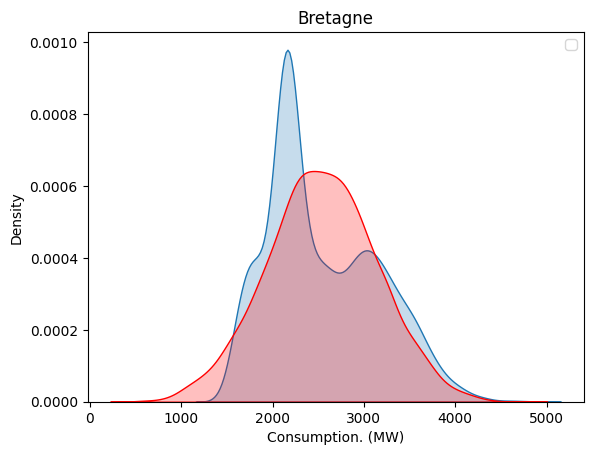

In [14]:
sns.kdeplot(data = df_region, color = 'blue', fill = True)
sns.kdeplot(data = df_region_generated, color = 'red', fill = True)
plt.title(region)
plt.xlabel("Consumption. (MW)")
plt.legend()
plt.show()

5. Do the same for the days corresponding to winter (from December 22 to March 21), after updating the model.

In [15]:
#define a function to determine the winter days
def is_Winter(date):
  return date.month in [1,2] or (date.month==12 and date.day in range(22,32)) or (date.month==3 and date.day in range(1,22))

df_bretagne = df[df.region=="Bretagne"]
bretagne = pd.DataFrame(df_bretagne)

#changing the column of date to datetime format
bretagne['date'] = pd.to_datetime(df['date'])

#generating a dataframe of winter days only of Bretagne
df_region_winter = df_region[bretagne.apply(lambda row: is_Winter(row['date']) and not pd.isna(row['consumption']), axis = 1)]


In [16]:
#calculating the parameters for winter days of Bretagne
consump_list_winter_a = df_region_winter['consumption'].tolist()

mean_winter_a = sum(consump_list_winter_a) / len(consump_list_winter_a)
n_winter_a = len(consump_list_winter_a)
consump_list_winter_a = [x - mean_winter_a for x in consump_list_winter_a]
consump_list_winter_a = [x ** 2 for x in consump_list_winter_a]
variance_winter_a = sum(consump_list_winter_a) / (len(consump_list_winter_a) - 1)

sd_winter_a = np.sqrt(variance_winter_a)

print("mean = ", mean_winter_a ,"sd = ", sd_winter_a)

mean =  3214.1782077393077 sd =  409.4763740819989


In [17]:
df_region_generated_winter = np.random.normal(mean_winter_a, sd_winter_a, n_winter_a)

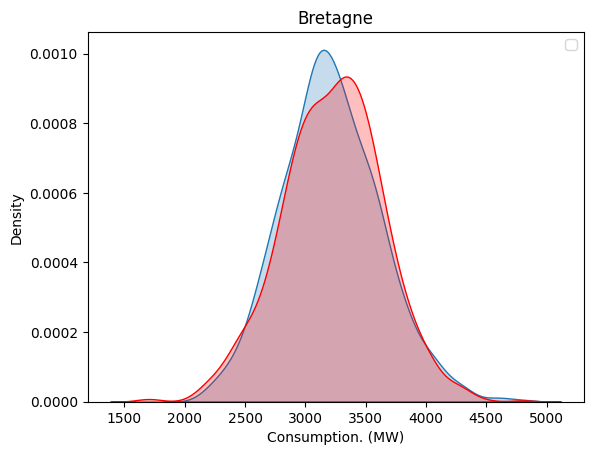

In [18]:
sns.kdeplot(data = df_region_winter, color = 'blue', fill = True)
sns.kdeplot(data = df_region_generated_winter, color = 'red', fill = True)
plt.title(region)
plt.xlabel("Consumption. (MW)")
plt.legend()
plt.show()

6. In which case the Gaussian model seems more appropriate?

It is clear that the model seems more appropriate in the second case, when considering only the winter days.

## B. Goodness of fit

We would like to confirm and quantify the observation of part A.

We propose the following metric to measure the dissimilarity between two pdf $f$ and $g$ (with respect to the Lebesgue measure):
$$
d(f, g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx.
$$

1. Show that $d(f,g) \in [0,1]$, with $d(f,g)=0$ if and only if $f=g$ almost everywhere (for the Lebesgue measure) and $d(f,g)=1$ if and only if $f$ and $g$ have disjoint supports.

Your answer:

-Proof of $d(f,g) \in [0,1]$:
The absolute value is always greater than or equal to zero:
$$
|f(x) - g(x)|  >= 0
$$
Then:
$$
d(f, g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx >= 0
$$

$$
|f(x) - g(x)| = |f(x) + (-g(x))| <= |f(x)| + |g(x)|
$$

$$
\frac 1 2 \int |f(x) - g(x)| \mathrm dx <= \frac 1 2 \int|f(x)| \mathrm dx + \frac 1 2 \int|g(x)| \mathrm dx  
$$
But:
$$
\int |f(x)| \mathrm dx = 1
$$
and
$$
 \int |g(x)| \mathrm dx = 1
$$
Thus, $$d(f,g) <=1$$


-Proof of d(f,g) = 0 iff f = g almost everywhere:

First, assume that d(f,g) = 0, then;
$$
\frac 1 2 \int |f(x) - g(x)| \mathrm dx = 0
$$
so, f(x) = g(x) almost everywhere.

Then, assume that f = g everywhere, then;
$$
\frac 1 2 \int |f(x) - g(x)| \mathrm dx = 0
$$
Thus, d(f,g) = 0



-Proof of d(f,g)=1  if and only if f and g have disjoint supports:

First assume that d(f,g) = 1:
$$
\int |f(x) - g(x)| \mathrm dx = 2
$$

Since the integral is over all x, it means that there exists at least one point or interval where ∣f(x)−g(x)∣ is not zero,so f(x) does not equal g(x) at that point or interval.

Then assume hat f and g have disjoint supports:

This means that there is no overlap between the regions where
f and g are non-zero. So:

Since their supports are disjoint, ∣f(x)−g(x)∣=1 almost everywhere in the region where they don't overlap, and 0 elsewhere.

Thus, the integral of |f(x) - g(x)| over this region is 1.
Thus, d(f,g) = 1

2. For the region Bretagne, compute the dissimilarity between the *kde* of real data and the density of the Gaussian model.

In [19]:
#df_region

consumption_data = df_region['consumption'].to_numpy()

kde = gaussian_kde(consumption_data)

x = np.linspace(min(consumption_data), max(consumption_data), n_a)
#the values of the KDE and Gaussian distribution at each point

kde_values = kde(x)
gaussian_values = norm.pdf(x, loc=mean_a, scale= sd_a)

differences = np.abs(kde_values - gaussian_values)

#integrating using trapezoidal rule
dissimilarity = 0.5 * np.trapz(differences, x)

print(dissimilarity)

0.1617828808080711


3. Do the same for the region Bretagne in winter and check your conclusion of part A.

In [20]:
#df_region_winter

consumption_data_winter = df_region_winter['consumption'].values
kde_winter = gaussian_kde(consumption_data_winter)

x_winter = np.linspace(min(consumption_data_winter), max(consumption_data_winter), n_winter_a)

kde_values_winter = kde_winter(x_winter)

gaussian_values_winter = norm.pdf(x_winter, loc=mean_winter_a, scale= sd_winter_a)

differences_winter = np.abs(kde_values_winter - gaussian_values_winter)
dissimilarity_winter = 0.5 * np.trapz(differences_winter, x_winter)

print(dissimilarity_winter)

0.029456040155400105


It is clear that the dissimilarity in winter is lower, and this exactly matches the results of part A, when considering only winter, the winter data and gaussian model are more similar.

4. Do the same for all regions. Give the result as a single dataframe.

In [21]:
#dissimilarity dataframe for all regions in all days
#for loop to iterate over all regions
all_regions_result = []
for i in regions:
    region_data_temp = df[df['region'] == i]
    consumption_data_temp = region_data_temp['consumption'].to_numpy()
    n_temp = region_data_temp['consumption'].count()
    mean_temp = region_data_temp['consumption'].mean()
    sd_temp = region_data_temp['consumption'].std()
    kde_temp = gaussian_kde(consumption_data_temp)
    x_temp = np.linspace(min(consumption_data_temp), max(consumption_data_temp), n_temp)
    kde_values_temp = kde_temp(x_temp)
    gaussian_values_temp = norm.pdf(x_temp, loc=mean_temp, scale= sd_temp)
    differences_temp = np.abs(kde_values_temp - gaussian_values_temp)
    dissimilarity_temp = 0.5 * np.trapz(differences_temp, x_temp)
    all_regions_result.append({'region': i, 'dissimilarity': dissimilarity_temp})

result_df_temp = pd.DataFrame(all_regions_result)
print(result_df_temp)


                        region  dissimilarity
0         Auvergne-Rhône-Alpes       0.152976
1      Bourgogne-Franche-Comté       0.119683
2                     Bretagne       0.161783
3          Centre-Val de Loire       0.172764
4                    Grand Est       0.107346
5              Hauts-de-France       0.119946
6                    Normandie       0.172445
7           Nouvelle-Aquitaine       0.195011
8                    Occitanie       0.198910
9             Pays de la Loire       0.152960
10  Provence-Alpes-Côte d'Azur       0.213296
11               Île-de-France       0.156695


In [22]:
#dissimilarity dataframe for all regions in only winter days
all_regions_result_winter = []

for i in regions:
    region_x_temp = df[df['region'] == i]
    x_region = pd.DataFrame(region_x_temp)
    x_region['date'] = pd.to_datetime(df['date'])
    region_data_temp_winter = region_x_temp[x_region.apply(lambda row: is_Winter(row['date']) and not pd.isna(row['consumption']), axis = 1)]
    consumption_data_temp_winter = region_data_temp_winter['consumption'].to_numpy()
    n_temp_winter = region_data_temp_winter['consumption'].count()
    mean_temp_winter = region_data_temp_winter['consumption'].mean()
    sd_temp_winter = region_data_temp_winter['consumption'].std()
    kde_temp_winter = gaussian_kde(consumption_data_temp_winter)
    x_temp_winter = np.linspace(min(consumption_data_temp_winter), max(consumption_data_temp_winter), n_temp_winter)
    kde_values_temp_winter = kde_temp_winter(x_temp_winter)
    gaussian_values_temp_winter = norm.pdf(x_temp_winter, loc=mean_temp_winter, scale= sd_temp_winter)
    differences_temp_winter = np.abs(kde_values_temp_winter - gaussian_values_temp_winter)
    dissimilarity_temp_winter = 0.5 * np.trapz(differences_temp_winter, x_temp_winter)
    all_regions_result_winter.append({'region': i, 'dissimilarity': dissimilarity_temp_winter})

result_df_temp_winter = pd.DataFrame(all_regions_result_winter)
print(result_df_temp_winter)

                        region  dissimilarity
0         Auvergne-Rhône-Alpes       0.037066
1      Bourgogne-Franche-Comté       0.036725
2                     Bretagne       0.029456
3          Centre-Val de Loire       0.042221
4                    Grand Est       0.037367
5              Hauts-de-France       0.026283
6                    Normandie       0.041308
7           Nouvelle-Aquitaine       0.052095
8                    Occitanie       0.059805
9             Pays de la Loire       0.036723
10  Provence-Alpes-Côte d'Azur       0.034007
11               Île-de-France       0.049812


5. Which region is best fitted by a Gaussian model in winter?

In [23]:
#region is best fitted by a Gaussian model is the region having the minimum dissimilarity

min_dissimilarity_index = result_df_temp_winter['dissimilarity'].idxmin()
region_with_min_dissimilarity_winter = result_df_temp_winter.loc[min_dissimilarity_index, 'region']

print(region_with_min_dissimilarity_winter, "is the best fitted by a Gaussian model in winter.")

Hauts-de-France is the best fitted by a Gaussian model in winter.


6. For this region and this season, plot the *kde* of real data and the *kde* of generated data on the same figure, as in part A.

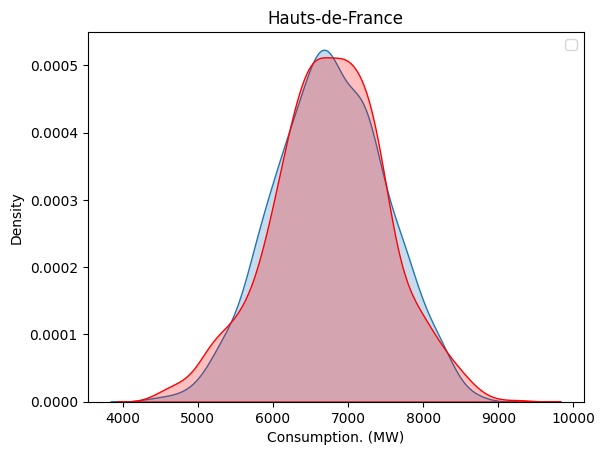

In [24]:
#finding the dataframe of this region only winter days

region_min_diss_df = df[df.region==region_with_min_dissimilarity_winter]
region_min_diss = pd.DataFrame(region_min_diss_df)
region_min_diss['date'] = pd.to_datetime(df['date'])
region_min_diss_winter = region_min_diss_df[region_min_diss.apply(lambda row: is_Winter(row['date']) and not pd.isna(row['consumption']), axis = 1)]

#find the parameters of this region
mean_part6 = region_min_diss_winter['consumption'].mean()
sd_part6 = region_min_diss_winter['consumption'].std()
n_part6 = region_min_diss_winter['consumption'].count()

region_min_diss_winter_generated = np.random.normal(mean_part6, sd_part6 ,n_part6)

sns.kdeplot(data = region_min_diss_winter, color = 'blue', fill = True)
sns.kdeplot(data = region_min_diss_winter_generated, color = 'red', fill = True)
plt.title(region_with_min_dissimilarity_winter)
plt.xlabel("Consumption. (MW)")
plt.legend()
plt.show()

## C. Bayesian statistics

We would like to include prior knowledge on the estimation, using Bayesian statistics.

Consider the region Bretagne in winter. We focus on the mean $\mu$, assuming the standard deviation is known and equal to $\sigma=400$MW. We assume a Gaussian prior on $\mu$ with mean $\mu_0=3500$MW and standard deviation $\sigma_0=500$MW.

1. Give the posterior distribution of $\mu$, using the parameters $\sigma$, $\mu_0$, $\sigma_0$ and the $n$ observations $x_1,\ldots,x_n$.

Your answer:

The posterior can be estimated by:
$$
\pi( \mu / x_1, x_2, ..., x_n) = \pi(\mu) p(x_1, x_2, ....,x_n/ \mu)
$$
Consider the prior distribution on $\mu$:
$$
\pi(\mu) α exp(- \frac 1 {2 \sigma_0 ^2} (\mu - \mu_0)^2 )α exp (- \frac 1 {2 \sigma_0^2}( \mu^2 - 2 \mu \mu_0))    
$$
The likelihood for n observations:
$$
p(x_1, x_2, ....,x_n / \mu) α exp (- \frac 1 {2 \sigma^2} \sum_{i=1}^n  (x_i - \mu)^2 ) α  exp (- \frac 1 {2 \sigma^2}  (n \mu^2  - 2 \mu \sum_{i=1}^nx_i )
$$
Then,

$$
\pi( \mu / x_1, x_2, ..., x_n) α exp(- \frac 1 2(\mu^2 ( \frac 1 \sigma_0^2 + \frac n \sigma^2  )-2  \mu(\frac {\mu_0} {\sigma_0^2} + \frac{\sum_{i=1}^nx_i} {\sigma^2} )))
$$

Note that: Let X ~ N( $\mu$, $\sigma^2$)

$$
p(X=x) α exp( \frac {-1} {2 \sigma^2} (x - \mu)^2) α \frac {-1} 2 ( \frac{x^2} {\sigma^2} -2 \frac{x\mu} {\sigma^2})
$$

Therefore, the posterior distrinution follows a nomral law with the following parameters:


$
mean = \frac {\frac {\mu_0} {\sigma_0^2} + \frac{\sum_{i=1}^nx_i} {\sigma^2} } { \frac 1 {\sigma_0^2} + \frac n {\sigma^2}  }$

$variance = \frac 1 {\frac 1 {\sigma_0^2} + \frac n {\sigma^2} }$

2. Give the parameters of the posterior distribution obtained for each year from 2013 to 2023, considered independently, in a single dataframe.

In [25]:
sd = 400
mean_theta = 3500
sd_theta = 500

yearly_consumption = pd.DataFrame()

df_region_winter['date'] = pd.to_datetime(df_region_winter['date'])
df_region_winter['year'] = df_region_winter['date'].dt.year
yearly_consumption = df_region_winter.groupby('year')['consumption'].sum().reset_index()

#for each year we consider the sum, number of observations

sum_list = yearly_consumption['consumption'].tolist()
count_df = df_region_winter.groupby(df_region_winter['date'].dt.year).count()
count_list = count_df['consumption'].tolist()

#creating empty list for each year

mean_list = []
sd_list = []
year_list = [year for year in range(2013, 2024)]

#for each year find sigma, mean using each year sum and number of observations

for i in range(0,11):
  denum_part_c = (1/(sd_theta**2)) + (count_list[i]/(sd**2))
  num_part_c = (mean_theta / (sd_theta**2) ) + ((sum_list[i])/(sd**2))

  mean_temp = num_part_c / denum_part_c

  mean_list.append(mean_temp)

  sd_temp = 1 / np.sqrt(denum_part_c)
  sd_list.append(sd_temp)
#merge these three lists in a single dataframe

posterior_parameters_year_year = pd.DataFrame({'year': year_list, 'mean': mean_list, 'sd': sd_list})
print(posterior_parameters_year_year)

    year         mean         sd
0   2013  3343.413504  42.014582
1   2014  3118.424537  42.014582
2   2015  3167.398500  42.014582
3   2016  3207.507639  41.784716
4   2017  3251.224625  42.014582
5   2018  3315.081642  42.014582
6   2019  3195.200794  42.014582
7   2020  3145.504147  41.784716
8   2021  3341.946161  42.014582
9   2022  3165.081642  42.014582
10  2023  3117.547123  44.543540


<ipython-input-25-b7b5c668fa20>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region_winter['date'] = pd.to_datetime(df_region_winter['date'])
<ipython-input-25-b7b5c668fa20>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region_winter['year'] = df_region_winter['date'].dt.year


3. Plot the density of the posterior distribution in 2023 and the *kde* of real data in 2023 on the same plot.

<ipython-input-26-9239612b5235>:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = real_distribution, color = 'blue', fill = True)


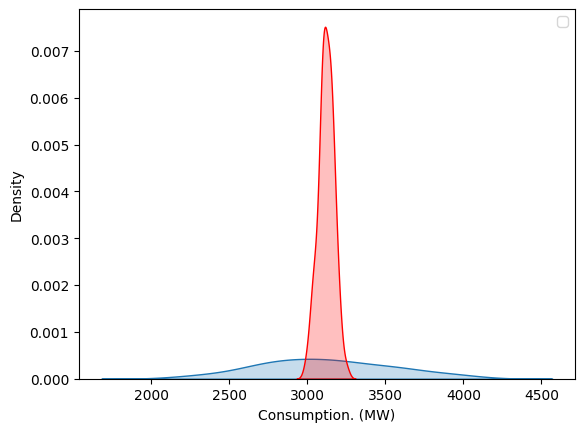

In [26]:
real_distribution = df_region_winter[df_region_winter['date'].dt.year == 2023]
posterior_distribution = np.random.normal(mean_list[10],sd_list[10],count_list[10])
sns.kdeplot(data = real_distribution, color = 'blue', fill = True)
sns.kdeplot(data = posterior_distribution, color = 'red', fill = True)
plt.xlabel("Consumption. (MW)")
plt.legend()
plt.show()

4. Discuss the results, comparing to those obtained in part A.

Your answer:

It is clear now that the model seems more appropriate than part A, when considering only the winter days and only 2023. The Gaussian model is acheived, by reducing some samples make the standard deviation smaller.

## D. Hypothesis testing

Consider the region Bretagne. While the standard deviation is equal to 400MW in winter, you would like to test the hypothesis that it was 500MW in 2023. The mean is supposed to be known and equal to 3200MW.
1. Propose a statistical test at level $\alpha$.

Your answer:

$H_0$ : {$\sigma_0$ = 400}

$H_1$ : {$\sigma_1$ = 500}

The test $δ(x) = 1_{{\frac {p1(x)} {p0(x)}} >c}$ is UMP, for any c > 0.

Given that ${\frac {p1(x)} {p0(x)}}$ is the likelihood ratio.

$$
p_1(x) = \prod_{i=1}^n (\frac 1  {\sqrt{2 \pi \sigma_1^2}} exp(- \frac 1 {2 \sigma_1 ^2} (x - \mu)^2 )
$$

$$
p_0(x) = \prod_{i=1}^n (\frac 1  {\sqrt{2 \pi \sigma_0^2}} exp(- \frac 1 {2 \sigma_0 ^2} (x - \mu)^2 )
$$

$$
\frac {p_1(x)} {p_0(x)} = \frac {\prod_{i=1}^n (\frac 1  {\sqrt{2 \pi \sigma_1^2}} exp(- \frac 1 {2 \sigma_1 ^2} (x - \mu)^2 )}  {\prod_{i=1}^n (\frac 1  {\sqrt{2 \pi \sigma_0^2}} exp(- \frac 1 {2 \sigma_0 ^2} (x - \mu)^2 )}
$$

$$
\frac {p_1(x)} {p_0(x)} = {{\frac {\frac 1 {(2\pi \sigma_1^2)^{\frac n 2}}} {\frac 1 {(2 \pi \sigma_0^2)^{\frac n 2}}}}} \frac {exp( -\frac {\sum_{i=1}^n (x_i - \mu)^2} {2 \sigma_1^2})} {exp( -\frac {\sum_{i=1}^n (x_i - \mu)^2} {2 \sigma_0^2})}
$$

$$
\frac {p_1(x)} {p_0(x)} = {(\frac {\sigma_0^2} {\sigma_1^2} )^{\frac n 2} } exp( -({\sum_{i=1}^n \frac {(x_i - \mu )^2} {2} (\frac 1 {\sigma_1^2} - \frac 1 {\sigma_0^2})}))
$$

$$
(\frac 1 {\sigma_1^2} - \frac 1 {\sigma_0^2}) < 0
$$

Then, the likelihood ratio is increasing.

We will accept $H_1$ if ${\frac {p_1(x)} {p_0(x)} > c}$ or equivalently if $\sum_{i=1}^n(x_i - \mu)^2 > d$.

For determining d we have, $P_{\theta_0}(\sum_{i=1}^n(X_i - \mu)^2 >d) = α $.

Note that, $\sum_{i=1}^n(X_i - \mu)^2$ follows a Chi-square test with n degrees of freedom.


2. Provide the result of this test for $\alpha=1\%$.

In [27]:
import scipy.stats as stats

mean_part_d = 3200
alpha_part_d = 0.01

#by considerin the winter of 2023 as dec from 2022 and jan, feb, march from 2023
#first find dec days
bretagne_winter_dec = df_region_winter[
    (df_region_winter['date'].dt.year == 2022) &
    (df_region_winter['date'].dt.month == 12) &
    (df_region_winter['date'].dt.day.isin(range(22, 31)))
]

#then find jan, feb, march days
bretagne_winter_jan_feb_march = df_region_winter[df_region_winter['date'].dt.year == 2023]

#merge the result in a single dataframe
bretagne_winter_2023_part_d = pd.concat([bretagne_winter_dec, bretagne_winter_jan_feb_march], axis=0)

temp_list_consumption_part_d = bretagne_winter_2023_part_d['consumption'].tolist()

#find the constant d using the quantile of Chi-square test
constant_d_part_d = stats.chi2.ppf(1 - alpha_part_d, df=len(temp_list_consumption_part_d))

#calculating the summation

temp_list_consumption_part_d = [x - mean_part_d for x in temp_list_consumption_part_d]
temp_list_consumption_part_d = [x **2 for x in temp_list_consumption_part_d]
if sum(temp_list_consumption_part_d > constant_d_part_d):
  print("H1 is accepted, the standard deviation equals 500.")
else:
  print("H0 is accepted, the standard deviation equals 400.")



H1 is accepted, the standard deviation equals 500.


## E. Testing independence

Consider the power consumption in Bretagne and Provence-Alpes-Côte d'Azur in winter.

1. Visualize the joint distribution of power consumption in these 2 regions using seaborn.

In [28]:
#df_region_winter
#df_provence_winter

#find the region Provence-Alpes-Côte d'Azur in winter
df_region_provence = df[df.region == "Provence-Alpes-Côte d'Azur"]
provence = pd.DataFrame(df_region_provence)
provence['date'] = pd.to_datetime(df['date'])
df_provence_winter = df_region_provence[provence.apply(lambda row: is_Winter(row['date']) and not pd.isna(row['consumption']), axis = 1)]

df_region_winter = df_region_winter.rename(columns={'consumption': 'consumption_bretagne'})
df_provence_winter = df_provence_winter.rename(columns={'consumption': 'consumption_provence'})


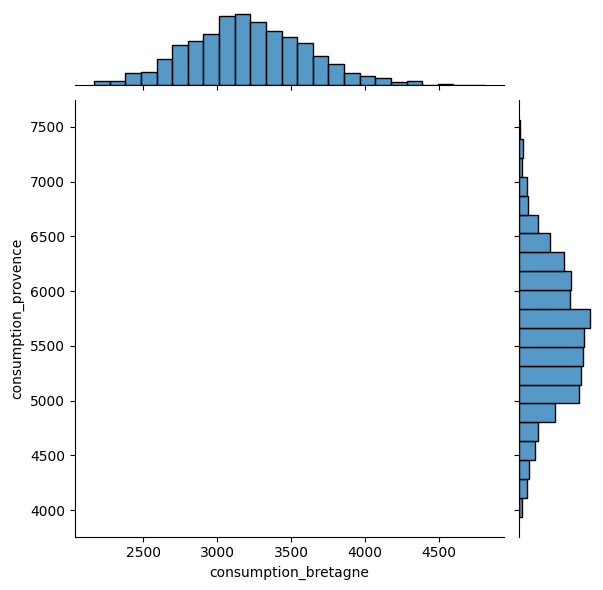

In [29]:
result_e = pd.concat([df_region_winter, df_provence_winter], axis=1)
result_e = result_e[['consumption_bretagne', 'consumption_provence']]

sns.jointplot(data=result_e, x='consumption_bretagne', y="consumption_provence", kind='scatter')


2. Do you think the power consumption in these two regions is independent?

Your answer:

Yes, the power in theses two regions is independent.

3. Propose a chi-2 test for the independence of the power consumption in these two regions at level $\alpha$.

Your answer:

Consider n i.i.d. observations $(X_1, Y_1), . . . ,(X_n, Y_n)$, each with the same distribution as (X, Y ).

We would
like to test the independence between X and Y , i.e., we would like to test the null hypothesis $H_0$ = {X ⊥ Y } against $H_1$ = {X ̸⊥ Y }.

We choose two partitions $A_1, . . . , A_K$ and $B_1, . . . , B_L$ of the corresponding value spaces.

Let:
$$N_{ij} = \sum_{t=1}^n 1_{{X_t ∈ A_i ; Y_t ∈ B_j}}$$   

$$N_{i} = \sum_{t=1}^n 1_{{X_t ∈ A_i}}$$

$$N_{j} = \sum_{t=1}^n 1_{{Y_t ∈ B_j}}$$


Let's define the test statistics:
$$
T(X,Y) = \sum_{ij} \frac {(N_{ij} - \frac {N_i N_j} {n} )^2} {\frac {N_i N_j} {n}}
$$
when n → +∞, $T(X,Y) $ ~ $X^2 (K-1)(L-1)$

The test is then:
δ(x, y) = $1_{T(x,y)>c}$

The independence is rejected whenever $T(x, y) > c$.

 For a test at level α, we have (under the null
hypothesis):

α = $p_0$(T(X, Y ) > c).

For large n, we can take c = Q(1−α) where Q is the quantile function of the $X^2(K-1)(L-1)$ distribution.

4. Give the result of this test for $\alpha=1\%$.

In [30]:
#then calculate T
#comapre T and c and then decision
#df_region_winter
#df_provence_winter

import scipy.stats as stats

#calculate the parameters K, L and c
k_e = df_region_winter.shape[0]
l_e = df_provence_winter.shape[0]
c_e = stats.chi2.ppf(1 - 0.01, k_e * l_e)

#saving the observations of the two random variables in a list
X_d = df_region_winter['consumption_bretagne'].tolist()
Y_d = df_provence_winter['consumption_provence'].tolist()

#create the joint table and initialize by zero
table_e = np.zeros((len(set(X_d)), len(set(Y_d))))

#fill the table with the observed frequencies
for i in range(len(X_d)):
    row_idx = list(set(X_d)).index(X_d[i])
    col_idx = list(set(Y_d)).index(Y_d[i])
    table_e[row_idx, col_idx] += 1

n = len(X_d)
test_statistic = 0

#calculate Ni and Nj
for i in range(table_e.shape[0]):
    for j in range(table_e.shape[1]):
        Nij = table_e[i, j]
        Ni = table_e[i, :].sum()
        Nj = table_e[:, j].sum()
        #calculating the test statistics
        cell_statistic = (Nij - (Ni * Nj / n)) ** 2 / (Ni * Nj)
        test_statistic += cell_statistic

if test_statistic > c_e:
  print("H1 is rejected, the two regions are dependent.")
else:
  print("H0 is accepted, the two regions are independent.")

H0 is accepted, the two regions are independent.


## F. Confidence intervals

Consider the region Bretagne in winter.

1. Provide a confidence interval at level $\alpha=95\%$ for the mean power consumption.

$\bar X $~ N$(\mu, \sigma^2)$ then T =  $ \frac {\bar X - \mu} {\sqrt{\frac V {(n-1)}}}$  ~ St(n-1),
 where V is the unbiased estimator of $\sigma^2$, V = $\frac 1 {n-1} \sum_{i=1}^n (X_i - \bar X)^2 $.


$P(−c < T < c) = 1 − α$ , c = Q(1- α/2).

IC = $[\bar X - {\sqrt{\frac V {(n-1)}}} c; \bar X + {\sqrt{\frac V {(n-1)}}} c]$

In [31]:
#df_region_winter

n_f = df_region_winter.shape[0]
degrees_of_freedom_f = n_f - 1
alpha_f = 0.05
c_f = stats.t.ppf(1 - alpha_f / 2, df=degrees_of_freedom_f)

sample_mean_f = df_region_winter['consumption_bretagne'].mean()
consumption_list_part_f = df_region_winter['consumption_bretagne'].tolist()
consumption_list_part_f = [num - sample_mean_f for num in consumption_list_part_f]
consumption_list_part_f = [x**2 for x in consumption_list_part_f]
v0_f = sum(consumption_list_part_f) / (len(consumption_list_part_f) -1)

lower_bound_f = sample_mean_f - c_f * np.sqrt(v0_f / n_f - 1)
upper_bound_f = sample_mean_f + c_f * np.sqrt(v0_f / n_f - 1)

print("The confidence interval is:")
print("[ ", lower_bound_f, ": ", upper_bound_f, " ]")


The confidence interval is:
[  3188.61108574851 :  3239.7453297301054  ]


2. Give the result of a Student test at level $5\%$ for the null hypothesis that the mean consumption in 2023 is equal to 3100MW.

In [32]:
a_value_f = 3100
if lower_bound_f <= a_value_f <= upper_bound_f:
  print("H0 is accepted.")
else:
  print("H1 is accepted.")

H1 is accepted.
